In [1]:
import pandas as pd
import numpy as np


In [2]:
product_df = pd.read_csv('Dataset/products.csv')
sales_df = pd.read_csv('Dataset/sales.csv')
stores_df = pd.read_csv('Dataset/stores.csv')

print(product_df.head(5))
print(sales_df.head(5))
print(stores_df.head(5))

   Product_ID      Product_Name Product_Category Product_Cost Product_Price
0           1     Action Figure             Toys       $9.99        $15.99 
1           2    Animal Figures             Toys       $9.99        $12.99 
2           3   Barrel O' Slime     Art & Crafts       $1.99         $3.99 
3           4  Chutes & Ladders            Games       $9.99        $12.99 
4           5  Classic Dominoes            Games       $7.99         $9.99 
   Sale_ID        Date  Store_ID  Product_ID  Units
0        1  2022-01-01        24           4      1
1        2  2022-01-01        28           1      1
2        3  2022-01-01         6           8      1
3        4  2022-01-01        48           7      1
4        5  2022-01-01        44          18      1
   Store_ID                Store_Name   Store_City Store_Location  \
0         1  Maven Toys Guadalajara 1  Guadalajara    Residential   
1         2    Maven Toys Monterrey 1    Monterrey    Residential   
2         3  Maven Toys G

In [3]:
print(product_df.isnull().sum())
print(sales_df.isnull().sum())
print(stores_df.isnull().sum())

Product_ID          0
Product_Name        0
Product_Category    0
Product_Cost        0
Product_Price       0
dtype: int64
Sale_ID       0
Date          0
Store_ID      0
Product_ID    0
Units         0
dtype: int64
Store_ID           0
Store_Name         0
Store_City         0
Store_Location     0
Store_Open_Date    0
dtype: int64


In [4]:
# Merge sales with products data on 'Product_ID'
merged_df = pd.merge(sales_df, product_df, on='Product_ID', how='left')

# Merge the result with stores data on 'Store_ID'
final_df = pd.merge(merged_df, stores_df, on='Store_ID', how='left')

In [5]:
final_df.head(5)

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,2022-01-01,24,4,1,Chutes & Ladders,Games,$9.99,$12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31
1,2,2022-01-01,28,1,1,Action Figure,Toys,$9.99,$15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01
2,3,2022-01-01,6,8,1,Deck Of Cards,Games,$3.99,$6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13
3,4,2022-01-01,48,7,1,Dart Gun,Sports & Outdoors,$11.99,$15.99,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23
4,5,2022-01-01,44,18,1,Lego Bricks,Toys,$34.99,$39.99,Maven Toys Puebla 3,Puebla,Residential,2014-12-27


In [6]:
len(final_df)

829262

In [7]:
# Remove dollar signs and convert 'Product_Cost' and 'Product_Price' to numeric
final_df['Product_Cost'] = final_df['Product_Cost'].replace('[\$,]', '', regex=True).astype(float)
final_df['Product_Price'] = final_df['Product_Price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Date' to datetime and extract year, month
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month

# Display the transformed DataFrame
final_df.head(5)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_11388\4210858331.py:2: SyntaxWarning: invalid escape sequence '\$'
  final_df['Product_Cost'] = final_df['Product_Cost'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_11388\4210858331.py:3: SyntaxWarning: invalid escape sequence '\$'
  final_df['Product_Price'] = final_df['Product_Price'].replace('[\$,]', '', regex=True).astype(float)


,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Year,Month
0,1,2022-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,2022,1
1,2,2022-01-01,28,1,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,2022,1
2,3,2022-01-01,6,8,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,2022,1
3,4,2022-01-01,48,7,1,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,2022,1
4,5,2022-01-01,44,18,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,2022,1


In [8]:
# Add profit column (Profit = (Product_Price - Product_Cost) * Units)
final_df['Profit'] = (final_df['Product_Price'] - final_df['Product_Cost']) * final_df['Units']



In [9]:
# Extract Year and Month from 'Date'
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month

# Now let's inspect the DataFrame to ensure the transformations are correct
final_df.head()


,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,Year,Month,Profit
0,1,2022-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,2022,1,3.0
1,2,2022-01-01,28,1,1,Action Figure,Toys,9.99,15.99,Maven Toys Puebla 2,Puebla,Downtown,2011-04-01,2022,1,6.0
2,3,2022-01-01,6,8,1,Deck Of Cards,Games,3.99,6.99,Maven Toys Mexicali 1,Mexicali,Commercial,2003-12-13,2022,1,3.0
3,4,2022-01-01,48,7,1,Dart Gun,Sports & Outdoors,11.99,15.99,Maven Toys Saltillo 2,Saltillo,Commercial,2016-03-23,2022,1,4.0
4,5,2022-01-01,44,18,1,Lego Bricks,Toys,34.99,39.99,Maven Toys Puebla 3,Puebla,Residential,2014-12-27,2022,1,5.0


 total sales by product category to see which category is performing well.


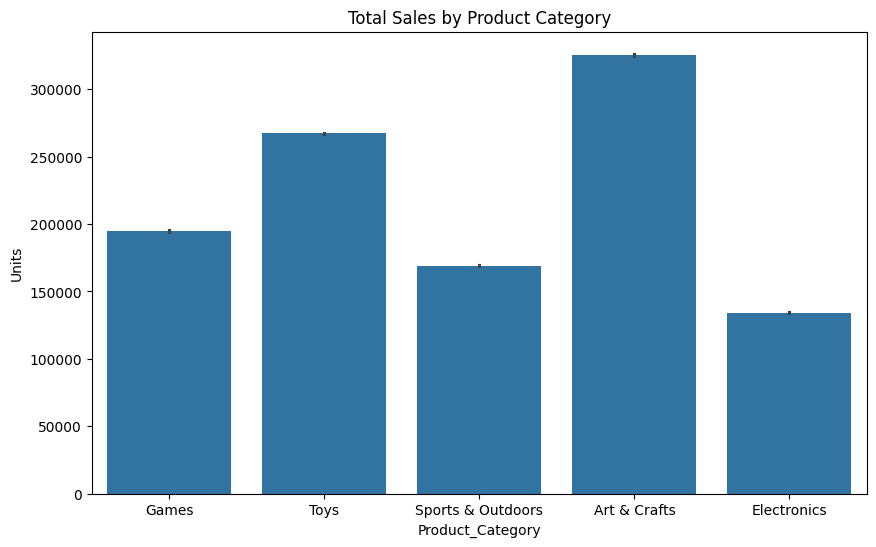

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Total sales (Units) by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(data=final_df, x='Product_Category', y='Units', estimator=sum)
plt.title('Total Sales by Product Category')
plt.show()


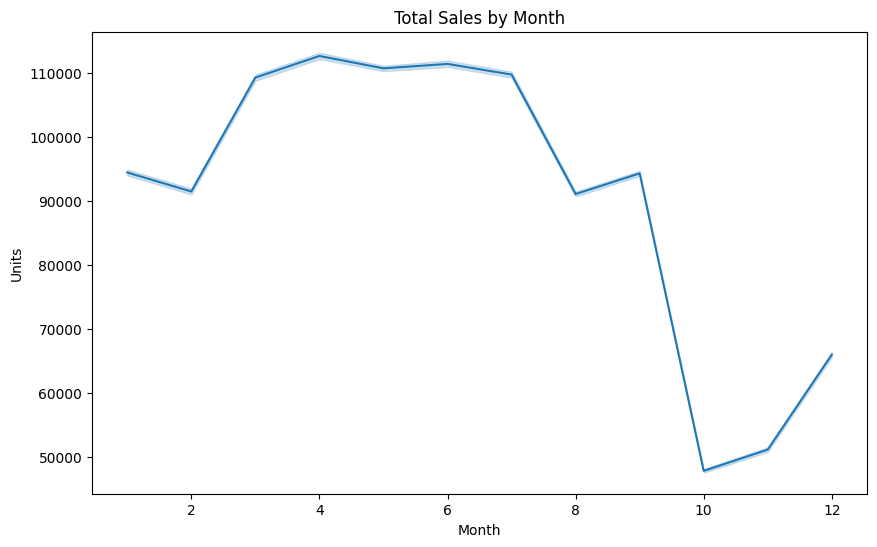

In [11]:
# Total sales (Units) by Month
plt.figure(figsize=(10, 6))
sns.lineplot(data=final_df, x='Month', y='Units', estimator=sum)
plt.title('Total Sales by Month')
plt.show()


In [ ]:
# Total profit by Product
plt.figure(figsize=(12, 6))
sns.barplot(data=final_df, x='Product_Name', y='Profit', estimator=sum)
plt.title('Total Profit by Product')
plt.xticks(rotation=45)
plt.show()


In [ ]:
final_df.columns

Index(['Sale_ID', 'Date', 'Store_ID', 'Product_ID', 'Units', 'Product_Name',
       'Product_Category', 'Product_Cost', 'Product_Price', 'Store_Name',
       'Store_City', 'Store_Location', 'Store_Open_Date', 'Year', 'Month',
       'Profit'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Using the same features and target variable
X = final_df[['Product_Cost', 'Product_Price']]
y = final_df['Units']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Instantiate the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')


Random Forest Mean Squared Error: 0.6435769340355606
Random Forest R-squared: 0.05284726033696985


In [ ]:
final_df[final_df['Product_ID'] == 9]['Profit'].sum()

38236.0

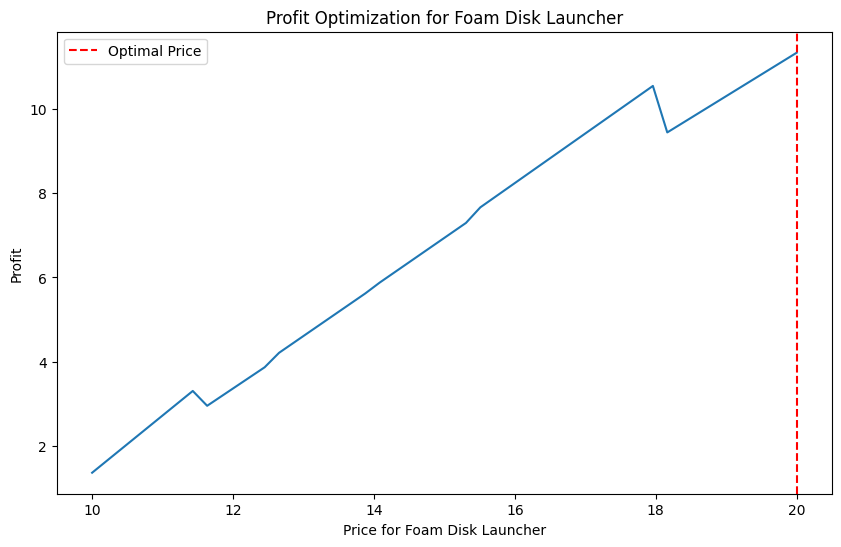

Actual Price for the Foam Disk Launcher: $11.99
Optimal Price for the Foam Disk Launcher: $20.00


In [18]:
import pandas as pd

# Function to calculate profit for a given price
def calculate_profit(cost, price, units_sold):
    return (price - cost) * units_sold

product_id = 12
product = final_df[final_df['Product_ID'] == product_id]
cost = product['Product_Cost'].values[0]

# Simulate prices between $10 and $20
price_points = np.linspace(10, 20, 50)

profits_rf = []
for price in price_points:
    # Create a DataFrame for prediction to maintain feature names
    input_data = pd.DataFrame([[cost, price]], columns=['Product_Cost', 'Product_Price'])
    units_sold = rf_model.predict(input_data)[0]
    profit = calculate_profit(cost, price, units_sold)
    profits_rf.append(profit)

# Plot profits for different price points using Random Forest predictions
plt.figure(figsize=(10, 6))
plt.plot(price_points, profits_rf)
plt.title(f'Profit Optimization for {product["Product_Name"].values[0]}')
plt.xlabel(f'Price for {product["Product_Name"].values[0]}')  # Updated x-axis label
plt.ylabel('Profit')
plt.axvline(x=price_points[np.argmax(profits_rf)], color='red', linestyle='--', label='Optimal Price')
plt.legend()
plt.show()


# Optimal price point

optimal_price_rf = price_points[np.argmax(profits_rf)]
print(f'Actual Price for the {product['Product_Name'].values[0]}: ${product['Product_Price'].values[0]}')
print(f'Optimal Price for the {product['Product_Name'].values[0]}: ${optimal_price_rf:.2f}')